<a href="https://colab.research.google.com/github/Hironobu-Kawaguchi/StatisticsWorkbook/blob/main/statwb06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

統計検定準1級対応　統計学実践ワークブック
# 第6章　連続型分布と標本分布

## 連続一様分布

## 正規分布

## 指数分布

## ガンマ分布

## ベータ分布

## コーシー分布

## 対数正規分布

## 2変量正規分布、多変量正規分布

## 混合正規分布

## カイ二乗分布（非心分布を含む）

## $t$分布（非心分布を含む）

## $F$分布（非心分布を含む）

## 例題

### 問6.1
あるテストの受験者は全部で1000人であり、受験者全体でのテストの得点の分布は正規分布 $N(65,10^2)$ で近似できるとする。このテストで$A$君は85点、$B$君は60点であった。なお、標準正規分布 $N(0,1)$ の確率密度関数は $f(z) = \frac{1}{\sqrt{2 \pi}} \exp (-z^2 / 2)$ である。  
(1) $A$君および$B$君の偏差値はいくらか。  
(2) $A$君の得点と$B$君の得点の間に入る受験者の人数はおおよそ何人か。  
(3) このテストの全受験者の得点の箱ひげ図を描いた場合、四分位範囲（箱の長さ）はいくらか。  
(4) このテストで65点以上の受験者のみを集めた場合、彼・彼女らの得点の平均値はおおよそいくらか。

### 答6.1
(1)  
$A$君　$(85-65) \div 10 \times 10 + 50 = 2 \times 10 + 50 = 70$  
$B$君　$(60-65) \div 10 \times 10 + 50 = -0.5 \times 10 + 50 = 45$  
(2) $X \sim N(65, 10^2)$ とすると、
$$ 1000 \times (P(X<85) - P(X<65)) = 1000 \times (0.9772 - 0.3085) = 1000 \times 0.6687 = 668.7 $$
したがって、おおよそ $669$人である。  
(3) $N(65, 10^2)$ の 下側25%点を $x_{0.25}$とすると、  
$$
    P(X \ge x_{0.25}) = 0.25 \\
    x_{0.25} = 65 - 0.675 \times 10 \\
    x_{0.75} = 65 + 0.675 \times 10 \\
$$
したがって四分位範囲は、
 $$ x_{0.75} - x_{0.25} = 2 \times (0.675 \times 10) = 13.5 $$  
(4) $X \sim N(65, 10^2)$ と $Z = (X - 65)/10 \sim N(0,1)$ に対して、$E[X \mid X \ge 65] = E[65 + 10Z \mid Z \ge 0] = 65 + 10E[Z \mid Z \ge 0]$ となる。ここで、$Z \ge 0$のもとでの$Z$の条件付き分布のの確率密度関数 $f(z \mid z \ge 0)$ は、
$$
  f(z \mid z \ge 0) = \begin{cases}
    \cfrac{\varphi (z)}{P(Z \ge 0)} = 2 \varphi (z) = \sqrt{\cfrac{2}{\pi}} e^{- \frac{z^2}{2}} & (z \ge 0) \\
    0 & (z < 0)
  \end{cases}
$$
となる。これより、
$$
    E[Z \mid Z \ge 0] = \int_0^{\infty} z \sqrt{\cfrac{2}{\pi}} e^{- \frac{z^2}{2}} dz = \sqrt{\cfrac{2}{\pi}} \left[ - e^{\frac{z^2}{2}} \right] _0^{\infty} = \sqrt{\cfrac{2}{\pi}} = 0.798
$$
となるので、$65$点以上の受験者のみを集めた場合の得点の平均値は、$E[X \mid X \ge 65] = 65 + 10E[Z \mid Z \ge 0] = 65 + 10 \times 0.798 = 72.98$ より、おおよそ$73$点となる。

65.56900982964318 9.783345592348931


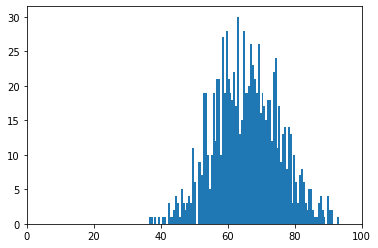

(1) A: 70.0 B: 45.0


In [7]:
import numpy as np
import matplotlib.pyplot as plt
N = 1000
# N = 10000000
AVERAGE = 65
STD = 10
A = 85
B = 60
x = np.random.normal(AVERAGE, STD, N)
print(x.mean(), x.std())
plt.hist(x, bins=101)
plt.xlim(0,100)
plt.show()
print("(1)", "A:", (A-AVERAGE)/STD*10+50, "B:", (B-AVERAGE)/STD*10+50)

In [8]:
from scipy.stats import norm
print("(2)", N * (norm.cdf(x=A, loc=AVERAGE, scale=STD) - norm.cdf(x=B, loc=AVERAGE, scale=STD)))
print(r"P(X<85) =", norm.cdf(x=85, loc=65, scale=10))
print(r"P(X<60) =", norm.cdf(x=60, loc=65, scale=10))

(2) 668.7123293258339
P(X<85) = 0.9772498680518208
P(X<60) = 0.3085375387259869


(3) 13.489795003921635
x_0.75 = 71.74489750196082
x_0.25 = 58.255102498039186


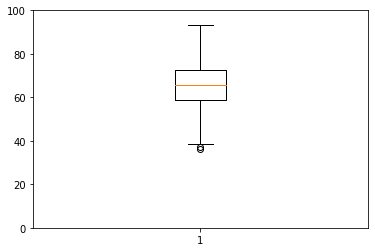

In [9]:
print("(3)", norm.ppf(q=0.75, loc=AVERAGE, scale=STD) - norm.ppf(q=0.25, loc=AVERAGE, scale=STD))
print("x_0.75 =", norm.ppf(q=0.75, loc=65, scale=10))
print("x_0.25 =", norm.ppf(q=0.25, loc=65, scale=10))
plt.boxplot(x)
plt.ylim(0,100)
plt.show()

(4) 73.22590428475665
(516,) 73.22590428475665 5.977824066708228


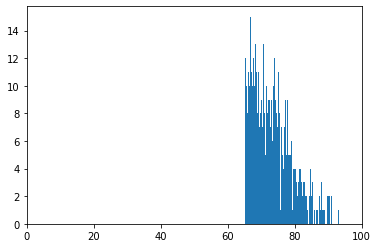

In [10]:
x2 = x[x >= AVERAGE]
print("(4)", x2.mean())
print(x2.shape, x2.mean(), x2.std())
plt.hist(x2, bins=101)
plt.xlim(0,100)
plt.show()